# Home Work 7

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

## Задача 1

Дана матрица объект-признак

**X** = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],  
    [-0.18757272, 1.30337355, 5.12093014, 3.46363202],  
    [-0.81094525, 1.82463398, 5.79686488, 1.86159445],  
    [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],  
    [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],  
    [-0.62972637, 0.77750764, 2.84124027, 4.54410559],  
    [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],  
    [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],  
    [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],  
    [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]  

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

### Решение:  

1. 
Для нахождения коэффициентов линейной регрессии будем использовать метод наименьших квадратов:  $$b = (X^\top X)^{-1} X^\top Y.$$  
Для оценки качества модели будем использовать коэффициент детерминации:  $$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$$

In [2]:
X = pd.DataFrame([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],  
    [-0.18757272, 1.30337355, 5.12093014, 3.46363202],  
    [-0.81094525, 1.82463398, 5.79686488, 1.86159445],  
    [ 0.75129018, 2.67392052, 3.65529809, 1.66746094],  
    [ 0.00972362, 1.97367255, 2.50594319, 1.69755173],  
    [-0.62972637, 0.77750764, 2.84124027, 4.54410559],  
    [ 2.29536229, 1.81206697, 1.95026215, 1.51874636],  
    [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],  
    [ 2.39252799, 3.17563985, 3.61420599, 5.10773362],  
    [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
Y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [3]:
X.shape, Y.shape

((10, 4), (10,))

In [4]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [5]:
x_1 = 0
while x_1 <= 3:
    for i in range(1, 4):
        x_2 = x_1 + i
        if x_2 <= 3:
            A = X[[x_1, x_2]].values
            ones = np.ones((A.shape[0], 1))
            A = np.hstack((ones, A))
            XTX = A.T.dot(A)
            XTX_inv = np.linalg.inv(XTX)
            b = XTX_inv.dot(A.T).dot(Y)
            z = A.dot(b)
            r = 1 - ((Y - z)**2).sum() / sum_of_squares(Y)
            print(f'Номера признаков: {x_1, x_2}\nКоэффициент детерминации: {r}')
        else:
            break
    x_1 += 1    

Номера признаков: (0, 1)
Коэффициент детерминации: 0.18113594742585215
Номера признаков: (0, 2)
Коэффициент детерминации: 0.7634246238793152
Номера признаков: (0, 3)
Коэффициент детерминации: 0.45329667831440756
Номера признаков: (1, 2)
Коэффициент детерминации: 0.5479482734039012
Номера признаков: (1, 3)
Коэффициент детерминации: 0.6062055761129932
Номера признаков: (2, 3)
Коэффициент детерминации: 0.6224419876505322


Таким образом получаем, что наилучший результат даёт модель линейной регрессии с признаками: X[0] и X[1]

In [6]:
A = X[[0, 2]].values
ones = np.ones((A.shape[0], 1))
A = np.hstack((ones, A))
XTX = A.T.dot(A)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(A.T).dot(Y)
result = A.dot(b)
r = 1 - ((Y - result)**2).sum() / sum_of_squares(Y)
print(result)
print(f'Коэффициент детерминации: {r}')

[ 9.29205855  9.52293042  9.32854895  9.2734825   6.67593463  6.04279092
  9.71768655 12.83152181 11.89122916  6.52606129]
Коэффициент детерминации: 0.7634246238793152


2. Коэффициент детерминации, равный  0.7643 , означает, что  76%  дисперсии переменной  Y  учитывается или объясняется моделью. Оставшиеся  24%  обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

Оценим построенное уравнение регрессии с помощью F-критерия Фишера: $$F_{факт} = \frac{r_{xy}^{2}}{(1 - r_{xy}^{2})} \cdot \frac{k_2}{k_1}$$
где:
$R^2$ – коэффициент детерминации,  
    $n$ – число наблюдений,  
    $k$ – число факторов,  
    $F_{crit}$ – критическое значение.

In [7]:
n = result.shape[0]
k1 = 2
k2 = n - k1 - 1
F = (r / (1 - r)) * (k2 / k1)
print(f'F = {F}')

F = 11.29443912292265


In [8]:
p = 0.95
alpha = 1 - p
F_crit = stats.f.ppf(1 - alpha, k1, k2)
print(f'F_crit = {F_crit}')

F_crit = 4.73741412777588


Имеем $F>F_{crit}$, следовательно уравнение регрессии статистически значимо.

### Задача 2

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Посчитать среднюю ошибку аппроксимации

### Решение:

In [9]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

**1.** Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

***а)*** Найдём коэффициенты линейной регрессии с помощью формул для парной регрессии:
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

In [10]:
b1 = np.cov(x, y, ddof=0)[0, 1] / np.var(x, ddof=0) 
b1

2.6205388824027653

In [11]:
b0 = y.mean() - b1 * x.mean()
b0

444.17735732435955

Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):$$y = 444.18 + 2.62 \cdot x$$т.е. с увеличением зарплаты на 1 условную единицу кредитный скоринг увеличивается на 2.62 ед

***b)*** Найдём коэффициенты линейной регрессии с помощью МНК:

Для удобства записи введём дополнительный «фактор» x0 = 1. Поиск коэффициентов линейной регрессии сводится к решению системы линейных уравнений:$$y = X \cdot b$$где b — столбец коэффициентов регрессии, X — матрица объект-признак, y — столбец целевой переменной. Чаще всего такая система не имеет решений, поэтому задача состоит в минимизации расстояния между векторами $X \cdot b$ и $y$:$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$Для такой задачи возможно записать аналитическое решение:$$b = (X^\top X)^{-1} X^\top y.$$

In [12]:
x2 = x.reshape(-1, 1)

y2 = y.reshape(-1, 1)
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

К матрице 𝑋 (массив x1) нужно также добавить столбец из 1 , соответствующий фиктивному фактору.

In [13]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

Запишем матрицу 𝑋⊤𝑋 и посчитаем её определитель.

In [14]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [15]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]



Модель линейной регрессии$$y = b_0 + b_1 x_1 + \dots + b_k x_k$$называется несмещённой, если математические ожидания правой и левой части равны:$$M(y) = M(b_0 + b_1 x_1 + \dots + b_k x_k)$$Как правило, несмещённые модели имеют лучшую обобщающую способность, чем смещённые, несмотря на то, что смещённые модели могут потенциально давать лучшие значения метрик качества (о них — чуть позже), чем несмещённые.

Проверим несмещённость уравнения регрессии из предыдущего примера:

In [16]:
x2.dot(b).mean(), y2.mean()

(709.8999999999999, 709.9)

**2.** Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

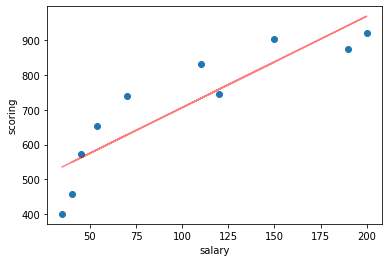

In [17]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

**3.** Посчитайте коэффициент детерминации 

Коэффициент детерминации:
$$R^2 = 1 - \dfrac{\sigma^2_{res}}{\sigma^2_{y}}$$
Для несмещённых моделей регрессии коэффициент детерминации можно также посчитать как квадрат коэффициента корреляции между объясняемой переменной $y$ и предсказанной переменной $z$:$$R^2 = r_{yz}^2.$$

In [18]:
z = b0 + b1 * x

np.vstack([y, z]).T[:5]

array([[401.        , 535.89621821],
       [574.        , 562.10160703],
       [874.        , 942.07974498],
       [919.        , 968.2851338 ],
       [459.        , 548.99891262]])

In [19]:
R1 = 1 - (z - y).var() / y.var()
R1

0.7876386635293686

Коэффициент детерминации, равный 0.7876 , означает, что 79% дисперсии переменной 𝑦 учитывается или объясняется моделью. Оставшиеся 21% обусловлены какими-то ещё факторами, которые модель не учла.

Поскольку наша модель является несмещённой, то же значение можно посчитать как квадрат коэффициента корреляции между массивами x1 и y1:

In [20]:
np.corrcoef(x, y) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

**4.** Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью F-критерия Фишера. Проверяется нулевая гипотеза о том, что все коэффициенты при факторах у регрессионной модели равны нулю (т.е. модель представляет из себя горизонтальную плоскость.)

Используемая здесь статистика:$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$ (иногда вместо $k_1$, $k_2$ пишут также $f_1$, $f_2$).

Данную статистику можно понимать как отношение объяснённой дисперсии к необъяснённой.

Критическое значение $F_{сrit} = F(k_1, k_2)$ можно найти по таблице (например, по такой) или с помощью функции scipy.stats.f.ppf.

Если $F > F_{crit}$, то нулевая гипотеза отвергается и уравнение регрессии признаётся статистически значимым.

In [21]:
k1 = 1
k2 = x.shape[0] - k1 - 1

F1 = (R1 / k1) / ((1 - R1) / k2)
F1

29.67164085966451

Для уровня значимости $\alpha = 0.05$ посчитаем по таблице значение $F_{crit} = F(1, 8)$. Оно равно $5.32$. То же самое с помощью scipy:

In [22]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо.

**5.** Посчитать среднюю ошибку аппроксимации.

Cредняя ошибка аппроксимации вычисляется по формуле:$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8$-$10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [23]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    return np.abs((y_real - y_pred) / y_real).mean()

In [24]:
mean_approximation_error(y, z)

0.11469251843561708